# Esercitazione 6

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

L'obiettivo della simulazione è quello di utilizzare gli algoritmi di Metropolis e di Gibbs per simulare l'evoluzione temporale di un modello di Ising unidimensionale.

**Modello di Ising**

In questo caso applichiamo il modello di Ising per descrivere l'interazione di un sistema di $N$ particelle dotate di spin che interagiscono tra loro. Nel caso unidimensionale (assumendo anche $\mu_B=1$ e $k_B=1$) l'hamiltoniana di Ising ha la forma
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove il primo termine rappresenta l'interazione tra primi vicini e il secondo la presenza di un eventuale campo (in questo caso magnetico) esterno.

Dato che il modello di Ising unidimensionale è risolvibile analiticamente, nei seguenti esercizi le soluzioni ottenute dalla misurazioni effettuate con metodi Monte Carlo saranno confrontate con le soluzioni analitiche.

### Punto 1

Implemenatre gli algoritmi di Metropolis e di Gibbs per simulare l'evoluzione temporale di un modello di ising unidimensionale con $N = 50$ spin.

### Punto 2

Calcolare, al variare della temperatura nell'intervallo $[0.5,2.0]$, energia interna per spin, capacità termica, magnetizzazione e suscettività. Utilizzare $J=1$ per lo svolgimentto dell'intero esercizio; $h = 0.00$ per il calcolo della capacità termica e suscettività magnetica del sistema e $h = 0.02$ per il calcolo della magnetizzazione.

Le simulazioni sono state fatte su sistemi lasciati equilibrare per 6000 steps prima di prendere le misure, suddivise in 200 blocchi da 2000 step ciascuno. E' stata esplorata la gamma di temperature $[0.2,3.0]$ con passi di 0.1 unità.

#### Metropolis

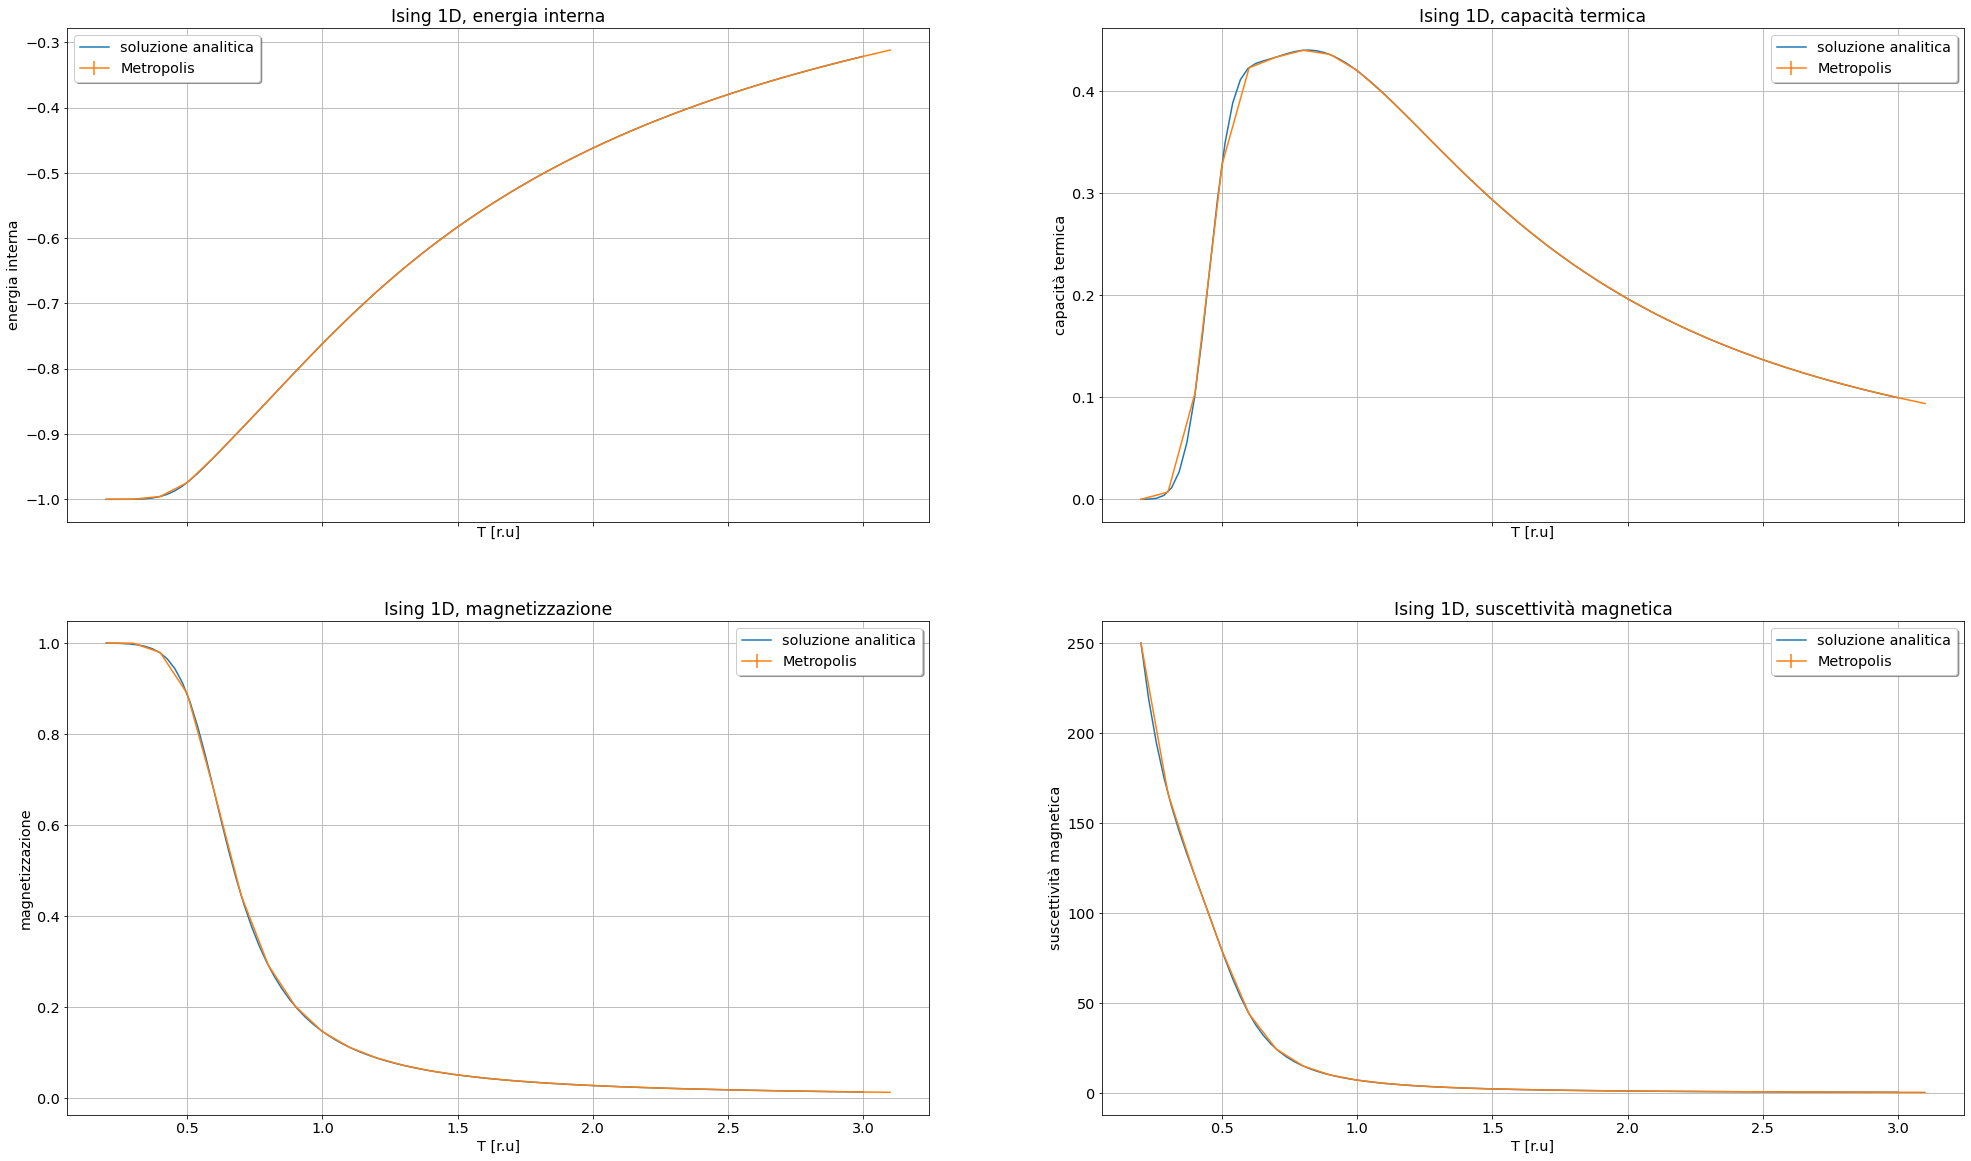

In [6]:
#Funzioni teoriche
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
b = beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

U = -J*( th + ch*thN )/( 1 + thN ) #energia
C = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) #capacità termica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN) #suscettività

h=0.02 #external field
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z) #magnetizzazione

#Caricamento dati simulazioni

temp, U_Met, errUM = np.loadtxt("./output.ene.0.000000metro", usecols=(0,1,2), unpack='true')
temp, C_Met, errCM = np.loadtxt("./output.heat.0.000000metro", usecols=(0,1,2), unpack='true')
temp, M_Met, errMM = np.loadtxt("./output.mag.0.020000metro", usecols=(0,1,2), unpack='true')
temp, X_Met, errXM = np.loadtxt("./output.chi.0.000000metro", usecols=(0,1,2), unpack='true')

#Plot dei grafici (teorici vs. Metropolis)

fig, axs = plt.subplots(2, 2, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0,0].plot(T, U, label="soluzione analitica")
axs[0,1].plot(T, C, label="soluzione analitica")
axs[1,0].plot(T, M, label="soluzione analitica")
axs[1,1].plot(T, X, label="soluzione analitica")

axs[0,0].errorbar(temp, U_Met, yerr=errUM, label="Metropolis")
axs[0,1].errorbar(temp, C_Met, yerr=errCM, label="Metropolis")
axs[1,0].errorbar(temp, M_Met, yerr=errMM, label="Metropolis")
axs[1,1].errorbar(temp, X_Met, yerr=errXM, label="Metropolis")

axs[0,0].set_title('Ising 1D, energia interna')
axs[0,1].set_title('Ising 1D, capacita termica')
axs[1,0].set_title('Ising 1D, magnetizzazione')
axs[1,1].set_title('Ising 1D, suscettività magnetica')

axs[0,0].set(xlabel=r'T [r.u]', ylabel=r'energia interna', title='Ising 1D, energia interna')
axs[0,1].set(xlabel=r'T [r.u]', ylabel=r'capacità termica', title='Ising 1D, capacità termica')
axs[1,0].set(xlabel=r'T [r.u]', ylabel=r'magnetizzazione', title='Ising 1D, magnetizzazione')
axs[1,1].set(xlabel=r'T [r.u]', ylabel=r'suscettività magnetica', title='Ising 1D, suscettività magnetica')

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)

axs[0,0].legend(loc="upper left", shadow=True)
axs[0,1].legend(loc="upper right", shadow=True)
axs[1,0].legend(loc="upper right", shadow=True)
axs[1,1].legend(loc="upper right", shadow=True)

plt.show()

Dai grafici si osserva che le grandezze ottenute dalla simulazione si adagiano molto bene sulla curva teorica.

#### Gibbs

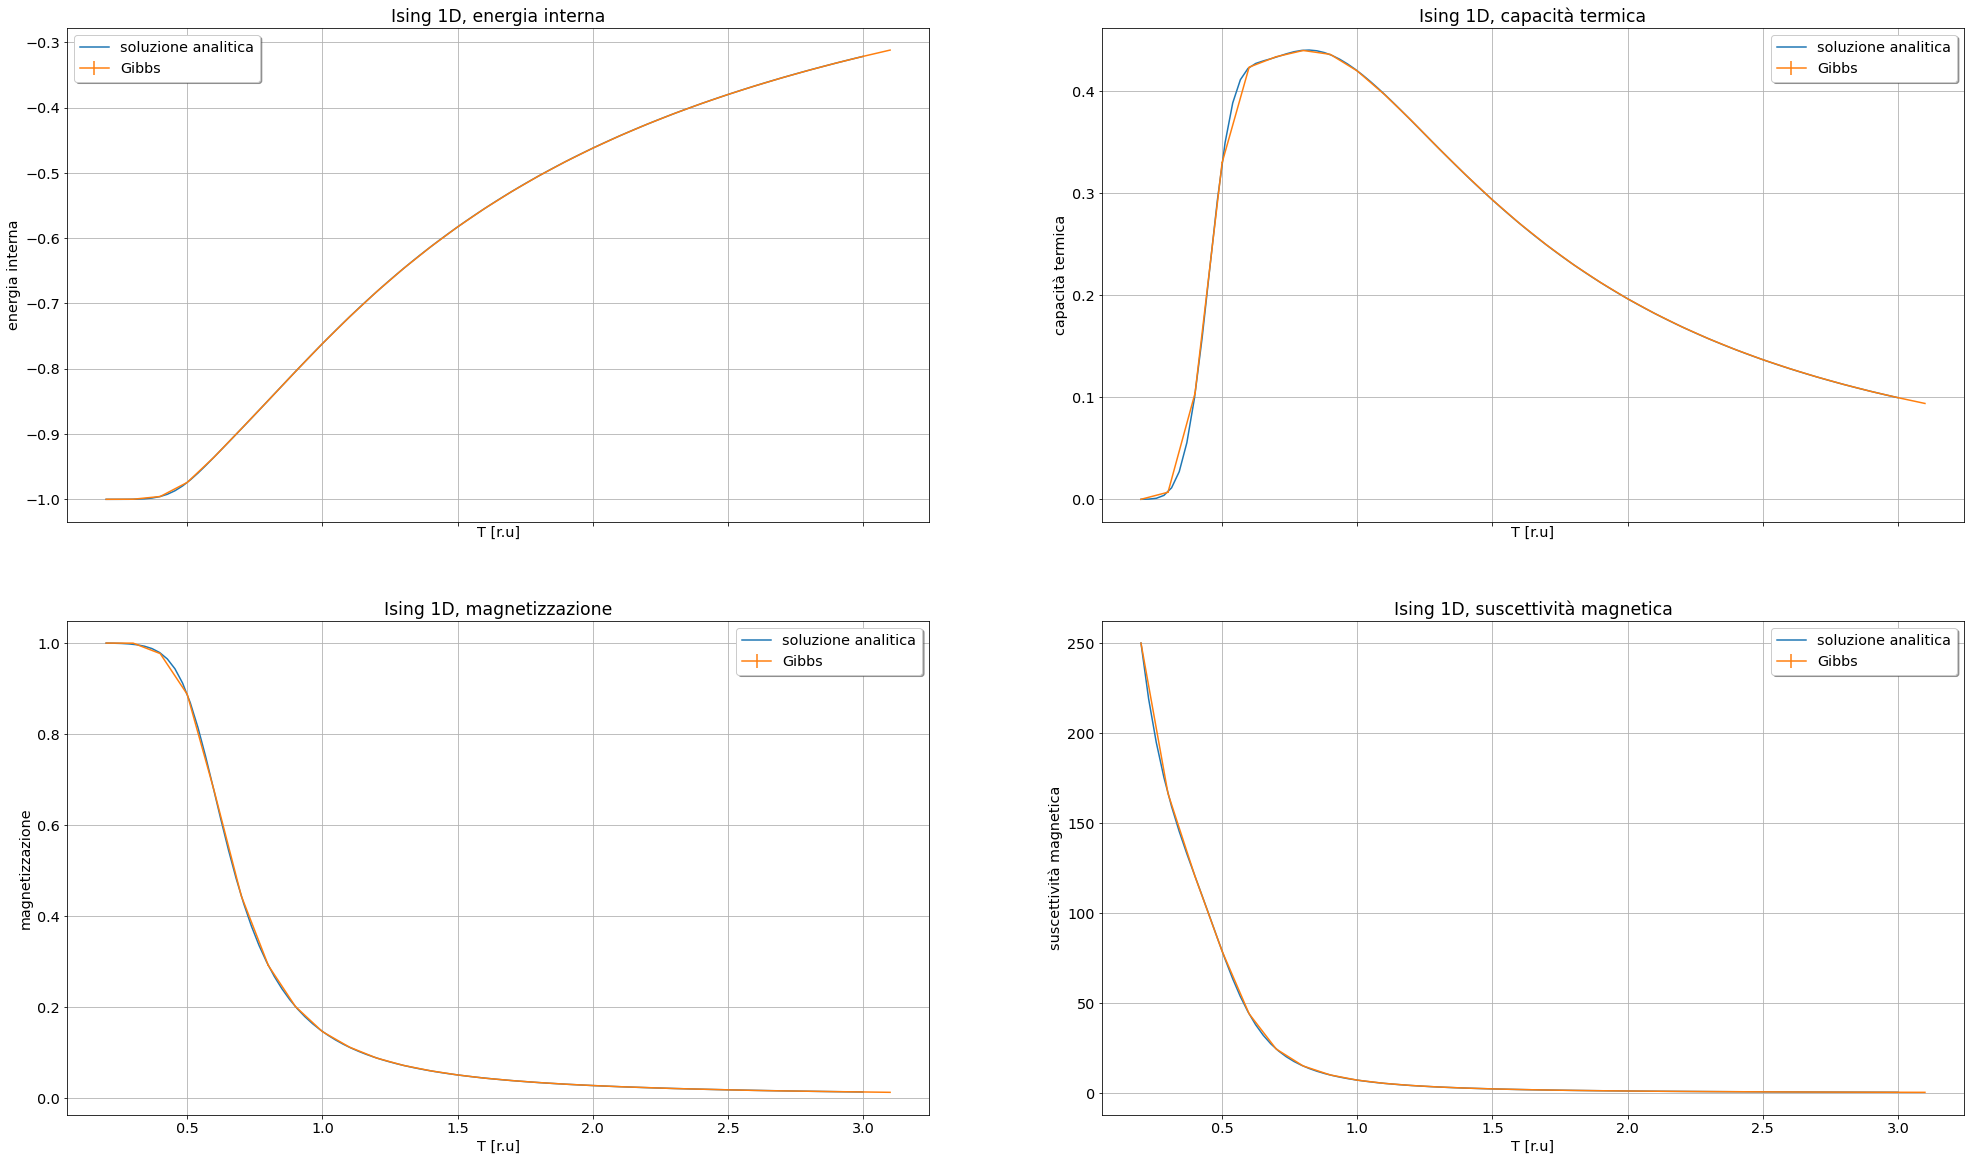

In [10]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
b = beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

U = -J*( th + ch*thN )/( 1 + thN ) #energia
C = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) #capacità termica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN) #suscettività

h=0.02 #external field
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z) #magnetizzazione


#Caricamento dati simulazioni

temp, U_Gib, errUG = np.loadtxt("./output.ene.0.000000gibbs", usecols=(0,1,2), unpack='true')
temp, C_Gib, errCG = np.loadtxt("./output.heat.0.000000gibbs", usecols=(0,1,2), unpack='true')
temp, M_Gib, errMG = np.loadtxt("./output.mag.0.020000gibbs", usecols=(0,1,2), unpack='true')
temp, X_Gib, errXG = np.loadtxt("./output.chi.0.000000gibbs", usecols=(0,1,2), unpack='true')

#Plot dei grafici
fig, axs = plt.subplots(2, 2, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0,0].plot(T, U, label="soluzione analitica")
axs[0,1].plot(T, C, label="soluzione analitica")
axs[1,0].plot(T, M, label="soluzione analitica")
axs[1,1].plot(T, X, label="soluzione analitica")

axs[0,0].errorbar(temp, U_Gib, yerr=errUG, label="Gibbs")
axs[0,1].errorbar(temp, C_Gib, yerr=errCG, label="Gibbs")
axs[1,0].errorbar(temp, M_Gib, yerr=errMG, label="Gibbs")
axs[1,1].errorbar(temp, X_Gib, yerr=errXG, label="Gibbs")

axs[0,0].set_title('Ising 1D, energia interna')
axs[0,1].set_title('Ising 1D, capacita termica')
axs[1,0].set_title('Ising 1D, magnetizzazione')
axs[1,1].set_title('Ising 1D, suscettività magnetica')

axs[0,0].set(xlabel=r'T [r.u]', ylabel=r'energia interna', title='Ising 1D, energia interna')
axs[0,1].set(xlabel=r'T [r.u]', ylabel=r'capacità termica', title='Ising 1D, capacità termica')
axs[1,0].set(xlabel=r'T [r.u]', ylabel=r'magnetizzazione', title='Ising 1D, magnetizzazione')
axs[1,1].set(xlabel=r'T [r.u]', ylabel=r'suscettività magnetica', title='Ising 1D, suscettività magnetica')

axs[0,0].legend(loc="upper left", shadow=True)
axs[0,1].legend(loc="upper right", shadow=True)
axs[1,0].legend(loc="upper right", shadow=True)
axs[1,1].legend(loc="upper right", shadow=True)

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

Anche in questo caso, le grandezze ottenute dalla simulazione si adagiano molto bene sulla curva teorica.

### Confronto risultati Metropolis & Gibbs

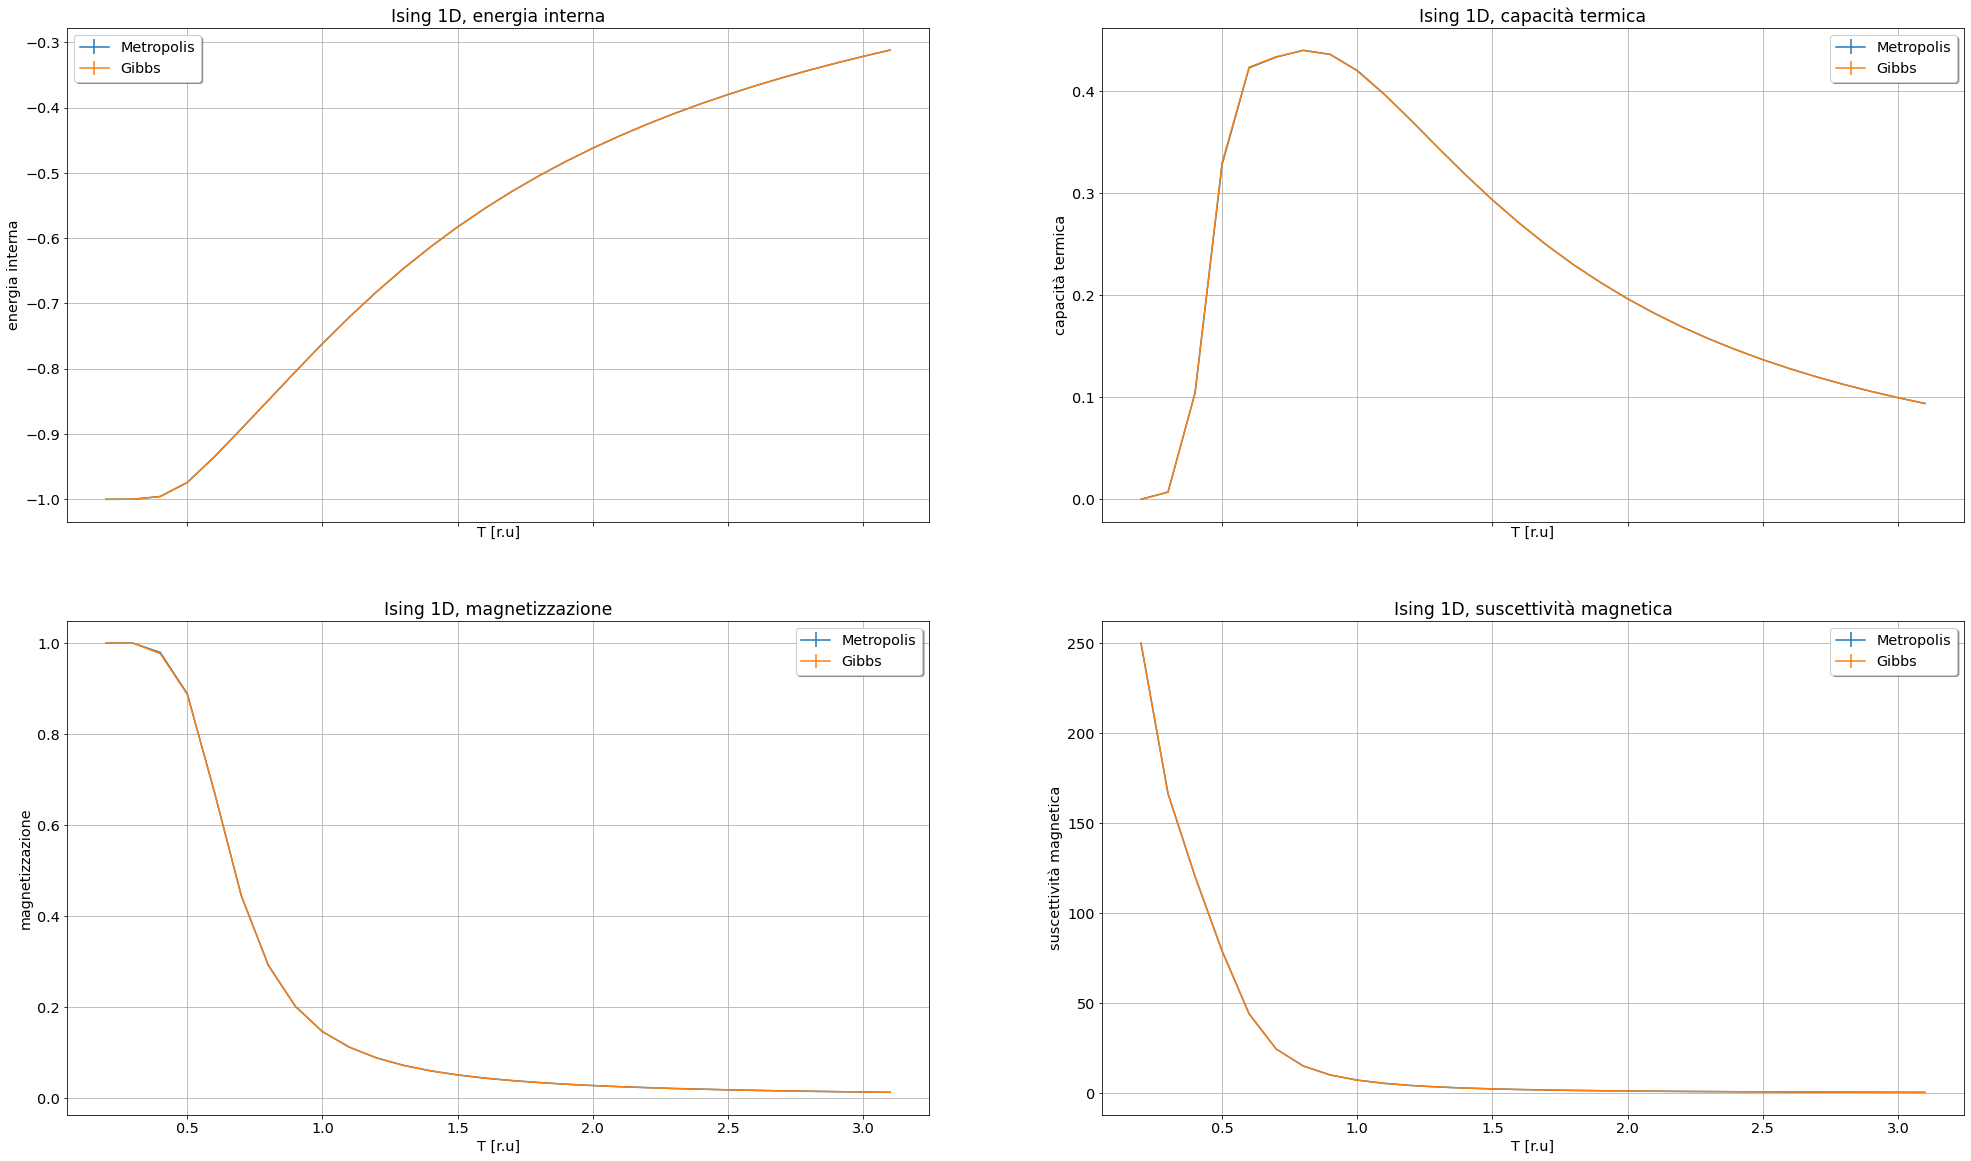

In [11]:
#Caricamento dati simulazioni

temp, U_Met, errUM = np.loadtxt("./output.ene.0.000000metro", usecols=(0,1,2), unpack='true')
temp, C_Met, errCM = np.loadtxt("./output.heat.0.000000metro", usecols=(0,1,2), unpack='true')
temp, M_Met, errMM = np.loadtxt("./output.mag.0.020000metro", usecols=(0,1,2), unpack='true')
temp, X_Met, errXM = np.loadtxt("./output.chi.0.000000metro", usecols=(0,1,2), unpack='true')

U_Gib, errUG = np.loadtxt("./output.ene.0.000000gibbs", usecols=(1,2), unpack='true')
C_Gib, errCG = np.loadtxt("./output.heat.0.000000gibbs", usecols=(1,2), unpack='true')
M_Gib, errMG = np.loadtxt("./output.mag.0.020000gibbs", usecols=(1,2), unpack='true')
X_Gib, errXG = np.loadtxt("./output.chi.0.000000gibbs", usecols=(1,2), unpack='true')


#Plot dei grafici
fig, axs = plt.subplots(2, 2, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0,0].errorbar(temp, U_Met, yerr=errUM, label="Metropolis")
axs[0,1].errorbar(temp, C_Met, yerr=errCM, label="Metropolis")
axs[1,0].errorbar(temp, M_Met, yerr=errMM, label="Metropolis")
axs[1,1].errorbar(temp, X_Met, yerr=errXM, label="Metropolis")

axs[0,0].errorbar(temp, U_Gib, yerr=errUG, label="Gibbs")
axs[0,1].errorbar(temp, C_Gib, yerr=errCG, label="Gibbs")
axs[1,0].errorbar(temp, M_Gib, yerr=errMG, label="Gibbs")
axs[1,1].errorbar(temp, X_Gib, yerr=errXG, label="Gibbs")

axs[0,0].set_title('Ising 1D, energia interna')
axs[0,1].set_title('Ising 1D, capacita termica')
axs[1,0].set_title('Ising 1D, magnetizzazione')
axs[1,1].set_title('Ising 1D, suscettività magnetica')

axs[0,0].set(xlabel=r'T [r.u]', ylabel=r'energia interna', title='Ising 1D, energia interna')
axs[0,1].set(xlabel=r'T [r.u]', ylabel=r'capacità termica', title='Ising 1D, capacità termica')
axs[1,0].set(xlabel=r'T [r.u]', ylabel=r'magnetizzazione', title='Ising 1D, magnetizzazione')
axs[1,1].set(xlabel=r'T [r.u]', ylabel=r'suscettività magnetica', title='Ising 1D, suscettività magnetica')

axs[0,0].legend(loc="upper left", shadow=True)
axs[0,1].legend(loc="upper right", shadow=True)
axs[1,0].legend(loc="upper right", shadow=True)
axs[1,1].legend(loc="upper right", shadow=True)

axs[0,0].grid(True)
axs[0,1].grid(True)
axs[1,0].grid(True)
axs[1,1].grid(True)
plt.show()

Tra i due algoritmi non si osservano particolari differenze nella smiulazione del modello di Ising.